In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
# Ignore warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('/kaggle/input/migraine-dataset/migraine_data.csv')


## Top 5 rows

In [31]:
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


# EDA

In [32]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

## Univariate Analysis
## Histograms for Numerical Features

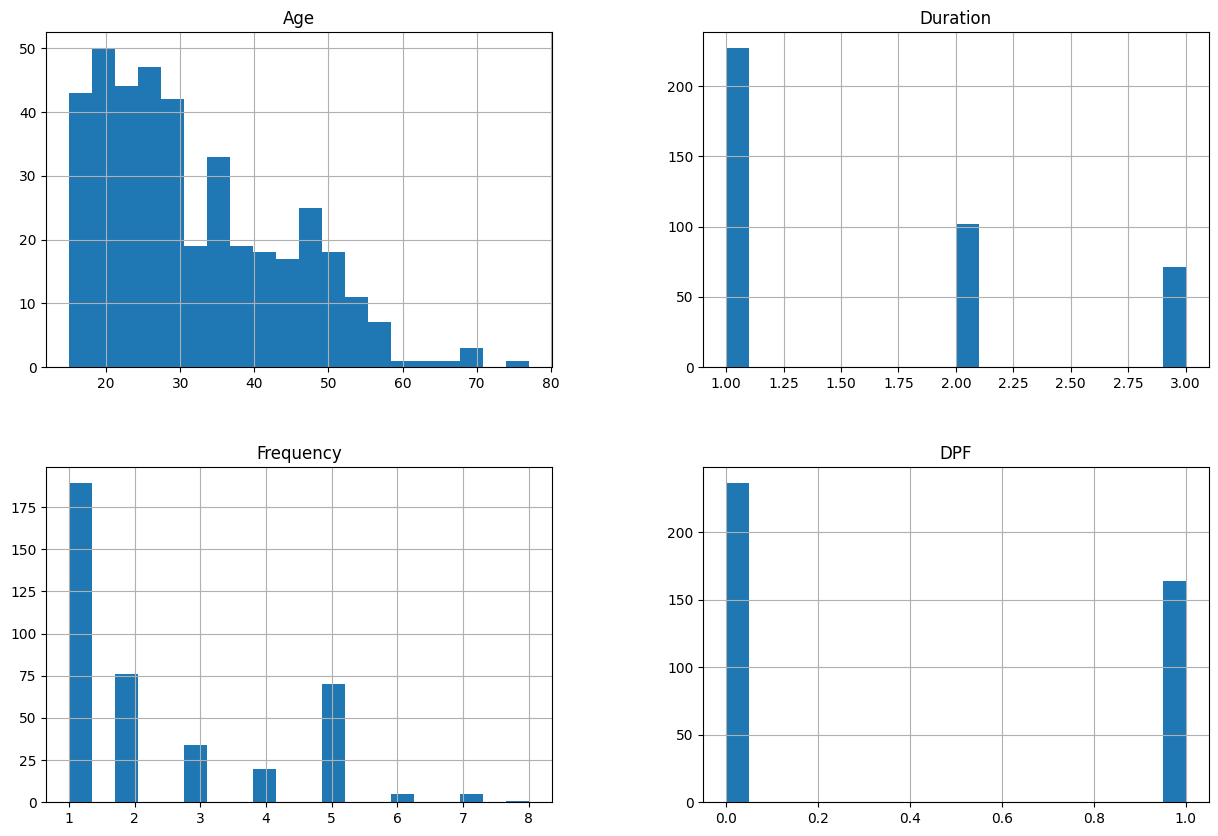

In [33]:

numeric_features = ['Age', 'Duration', 'Frequency', 'DPF']
categorical_features = ['Location', 'Character', 'Intensity', 'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia']


df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.show()

## Bar Plots for Categorical Features

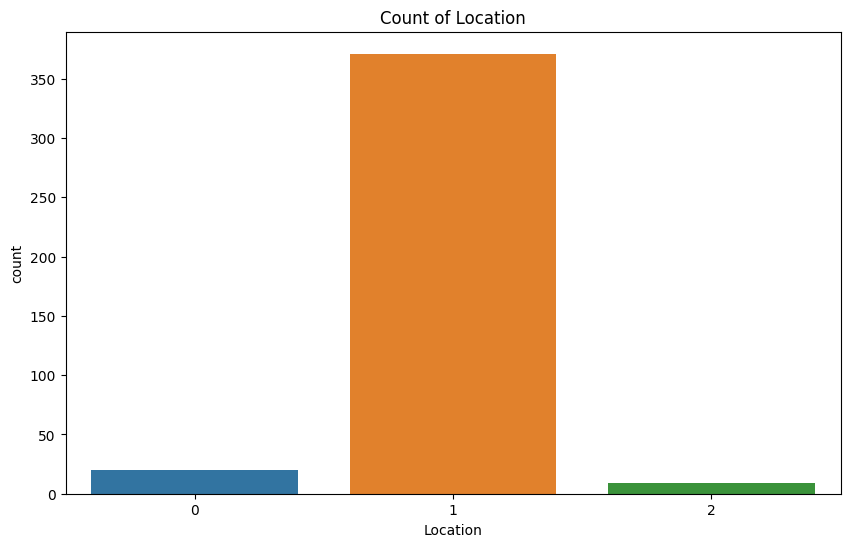

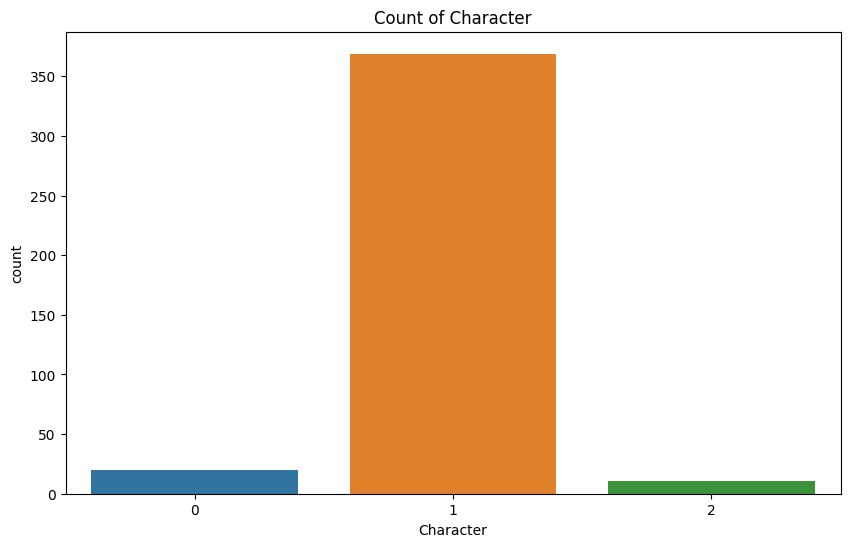

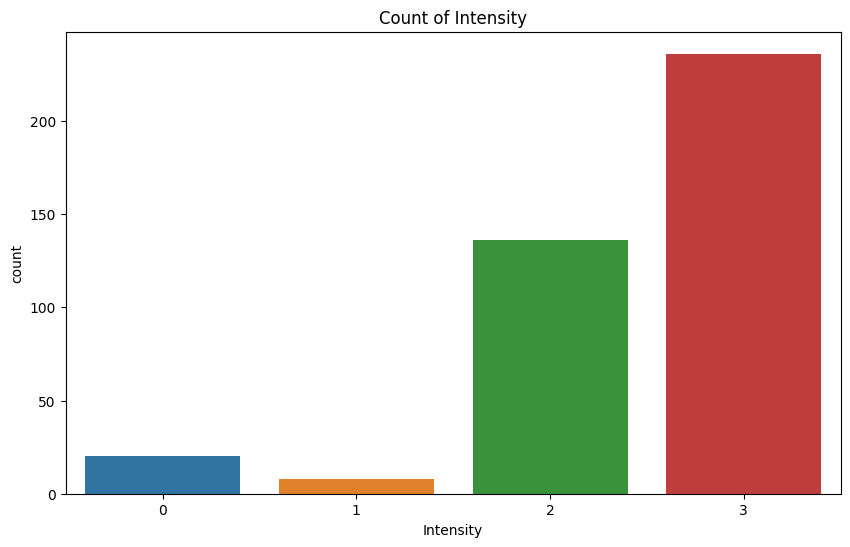

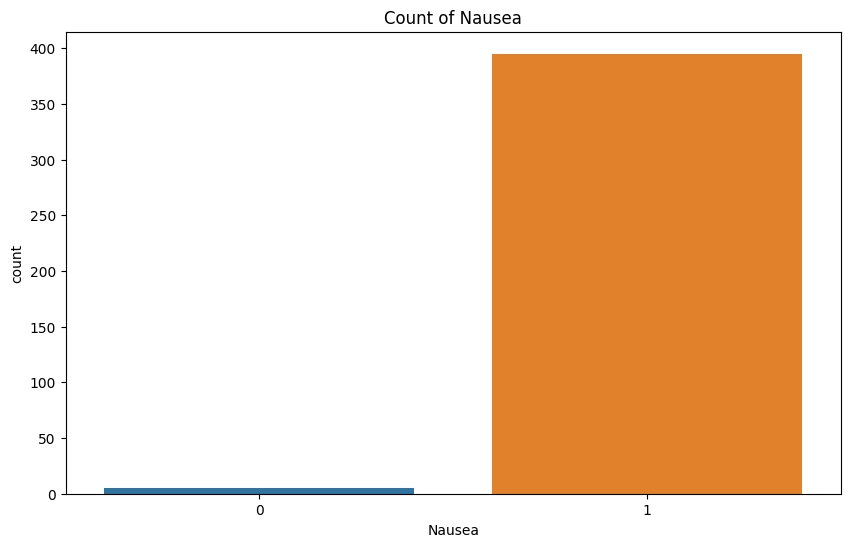

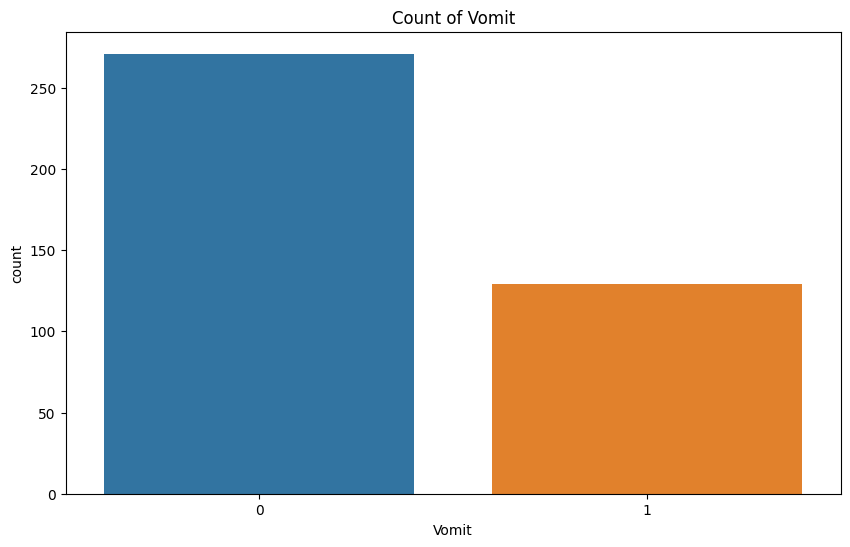

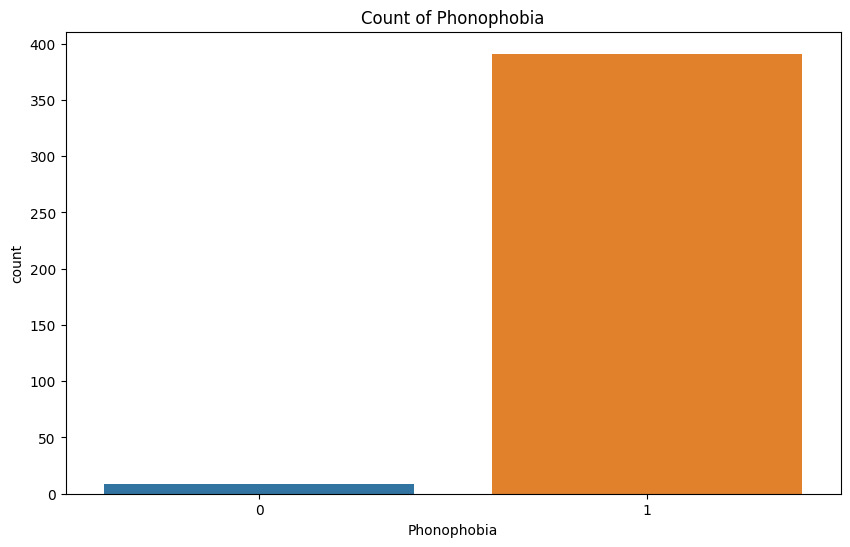

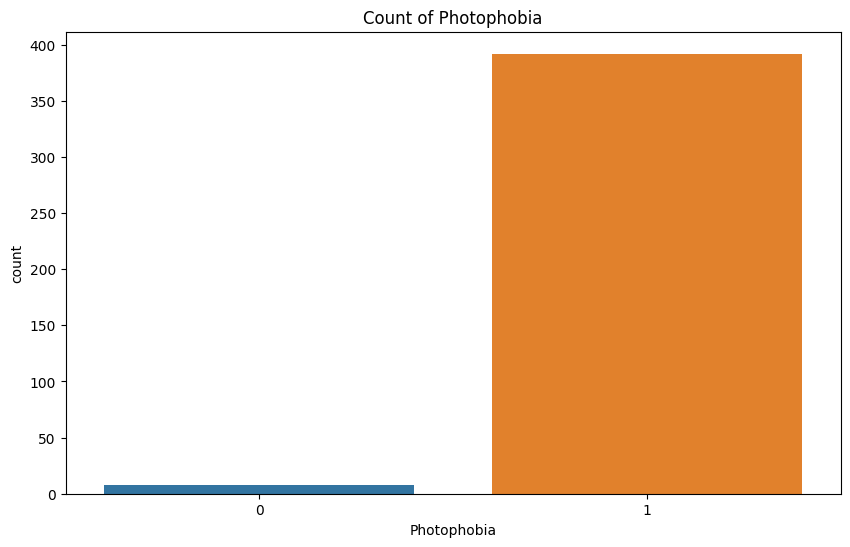

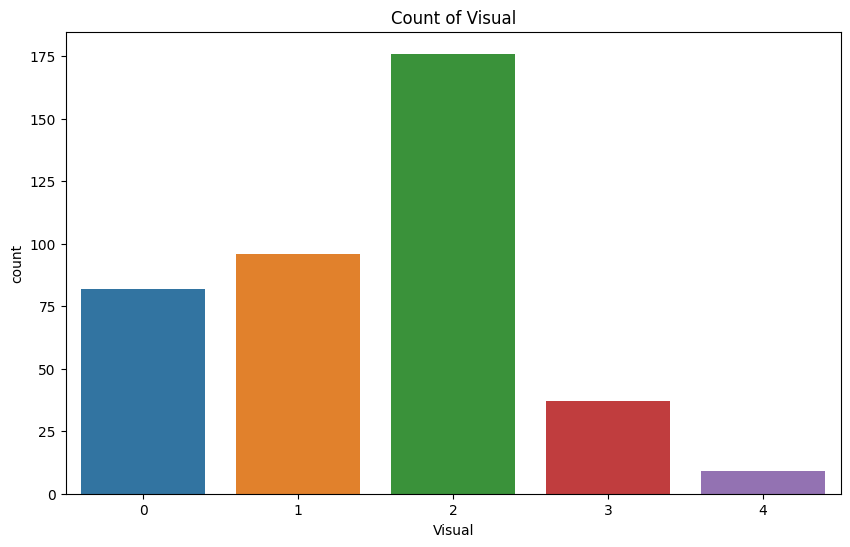

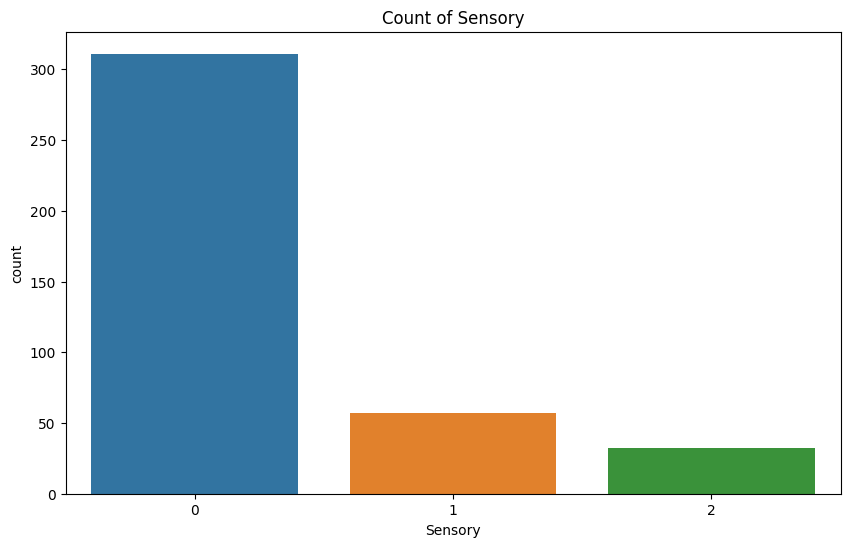

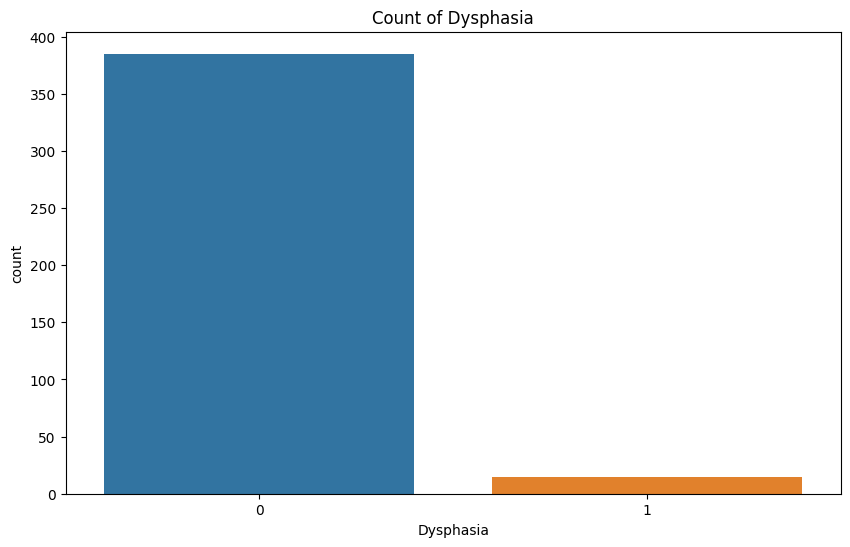

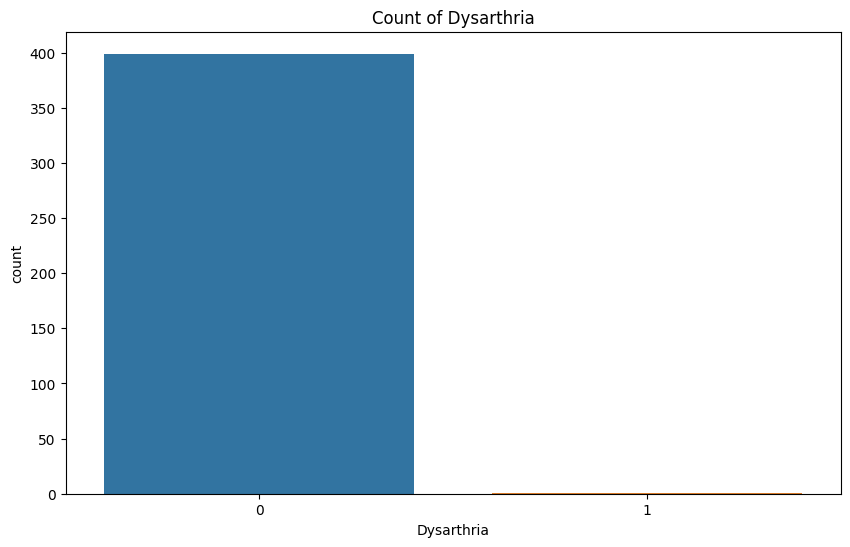

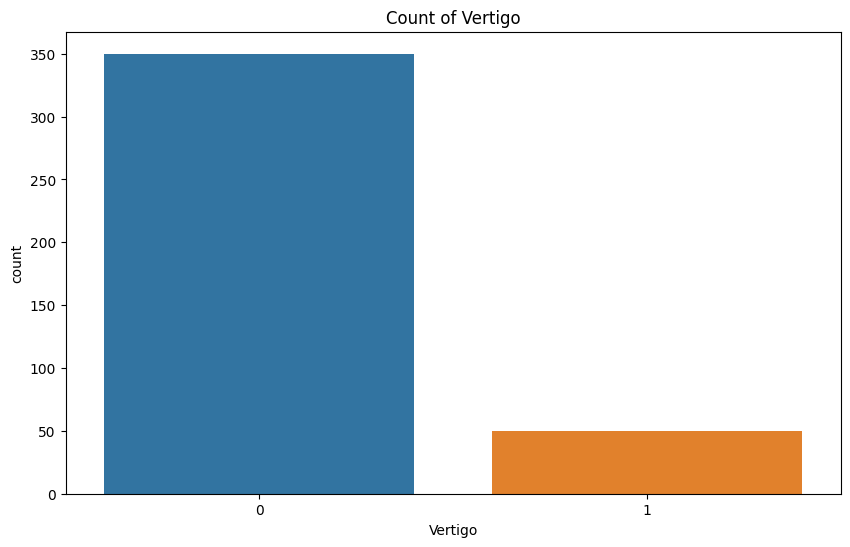

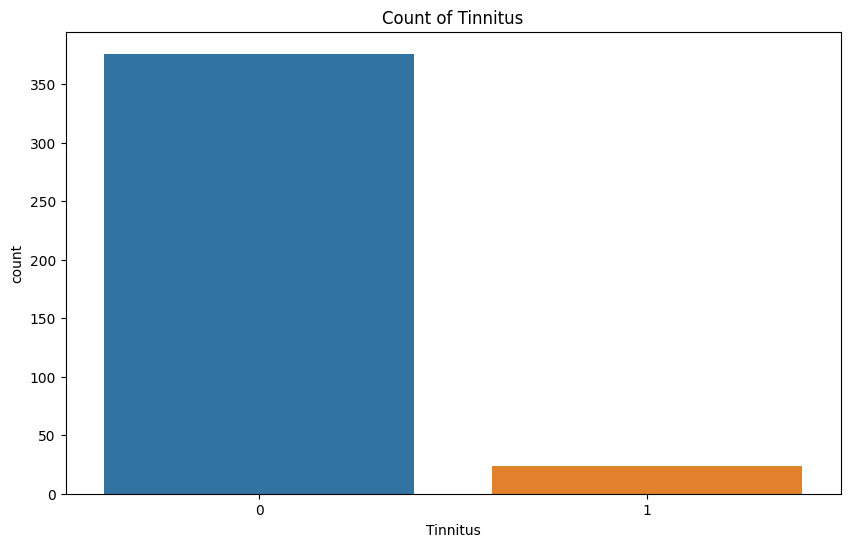

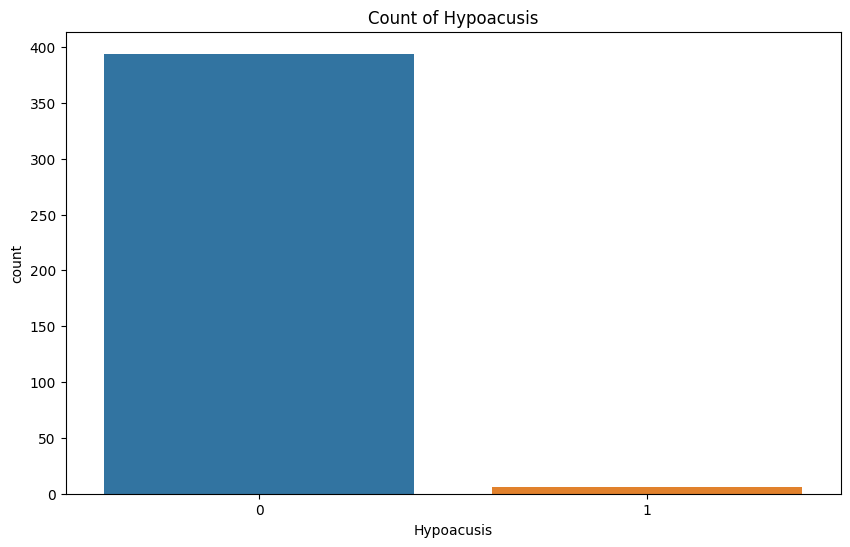

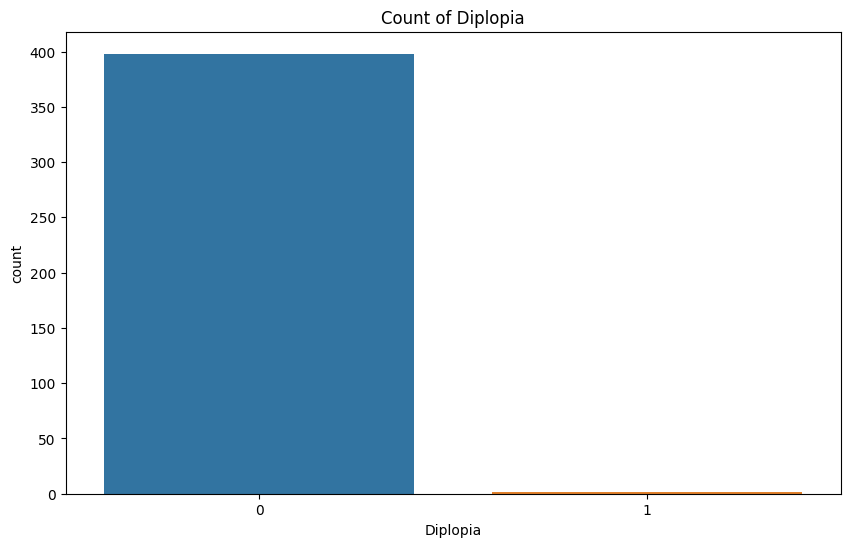

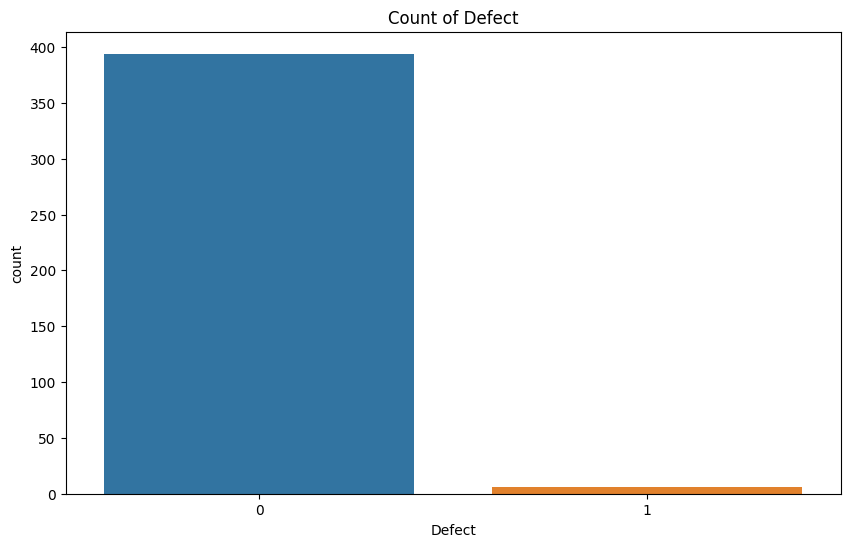

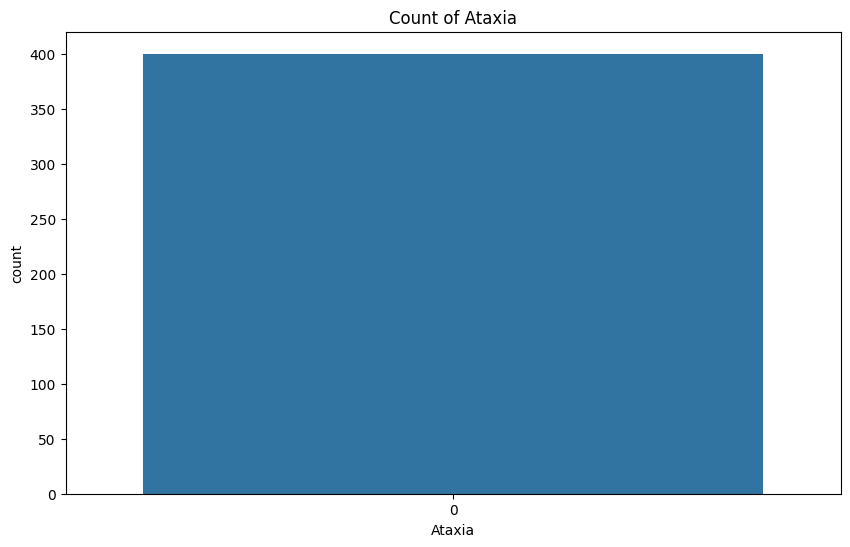

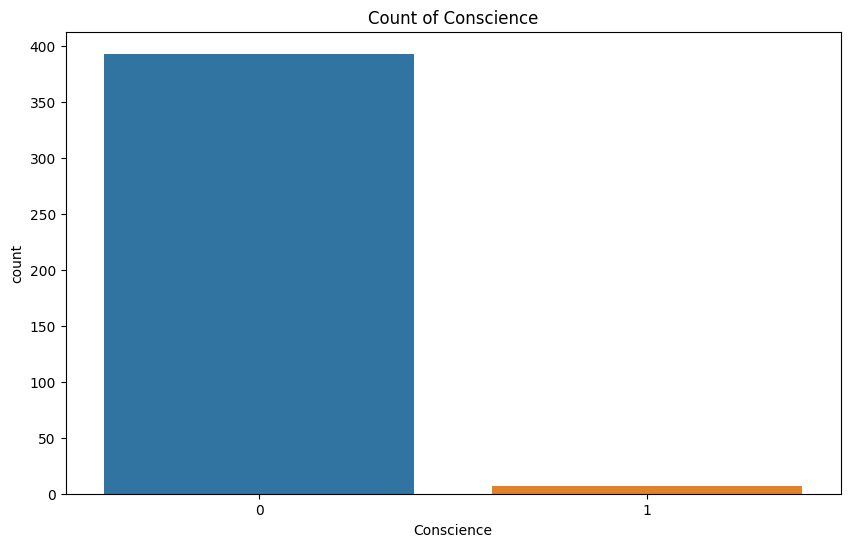

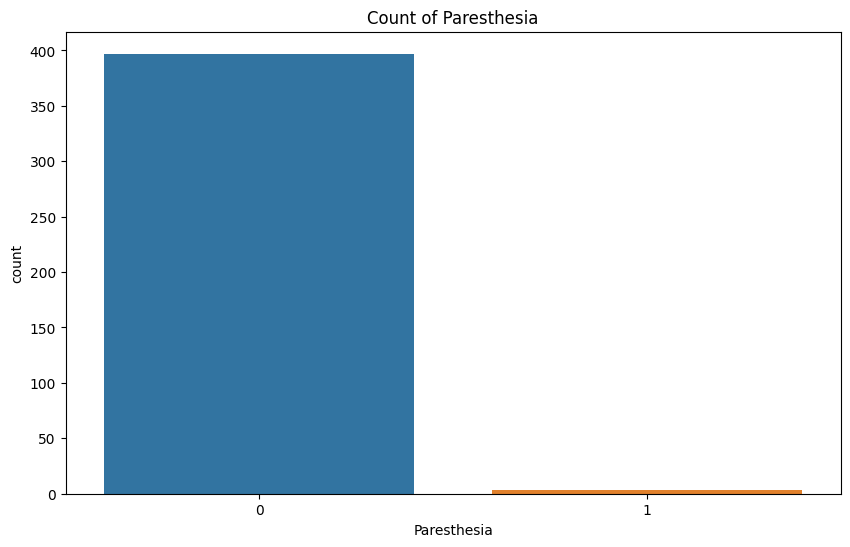

In [34]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Count of {feature}")
    plt.show()

## Bivariate/Multivariate Analysis
## Scatter Plot for Relationships between Numerical Features

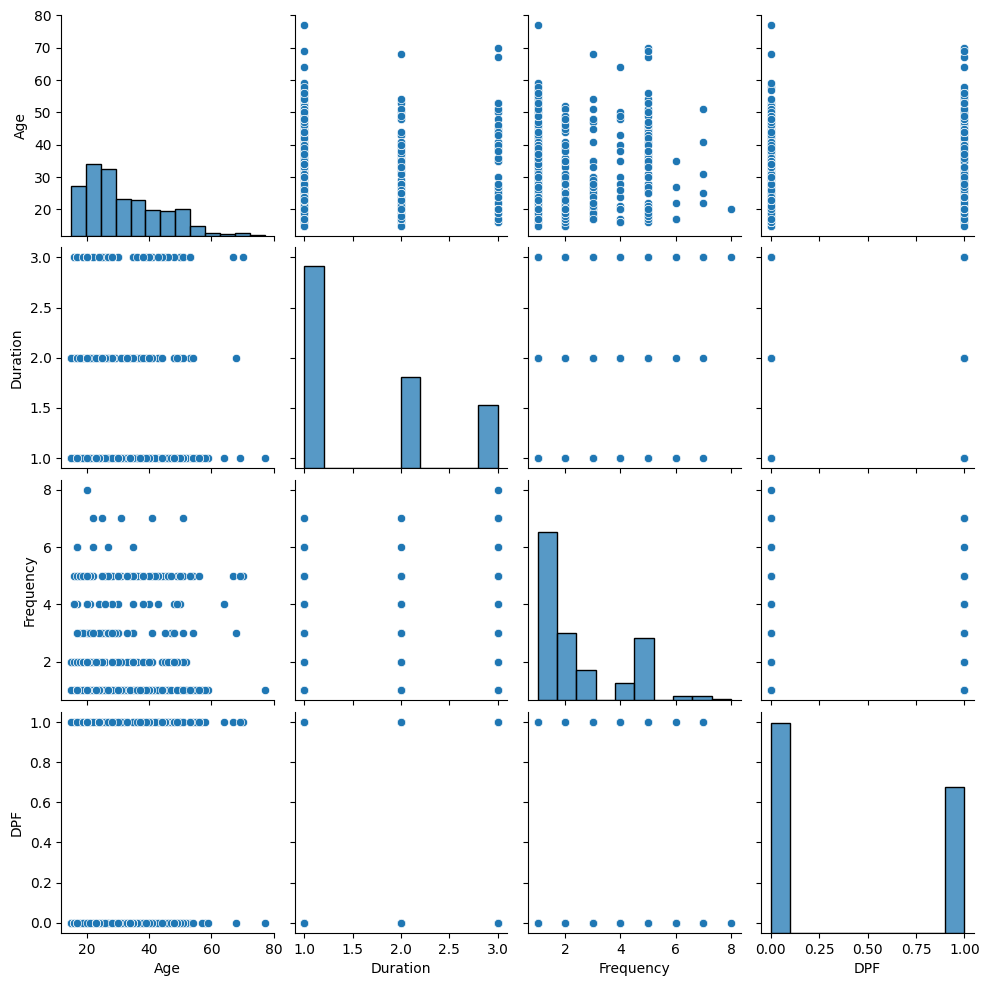

In [35]:

sns.pairplot(df[numeric_features])
plt.show()

## Correlation Matrix or Heatmap

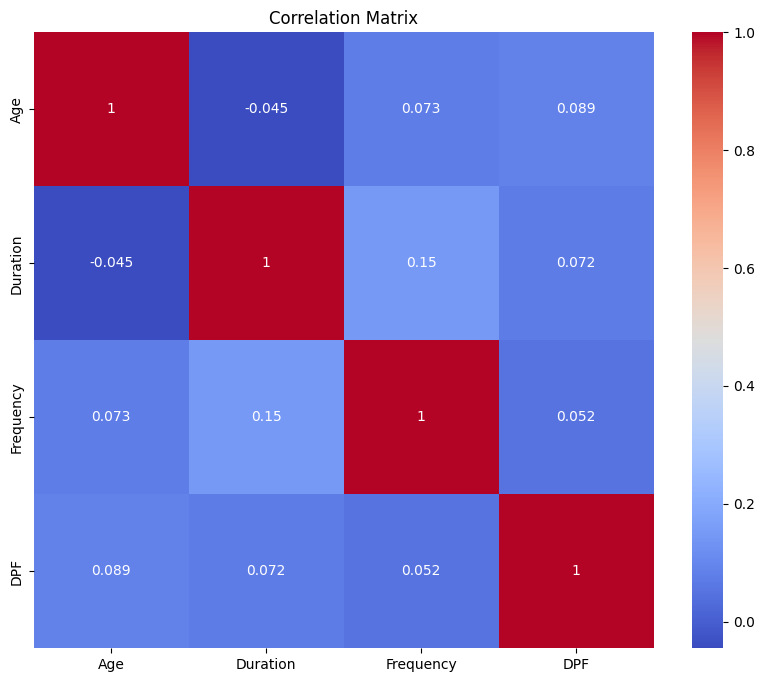

In [36]:

correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Box Plots for Numerical Variables based on Categorical Variables

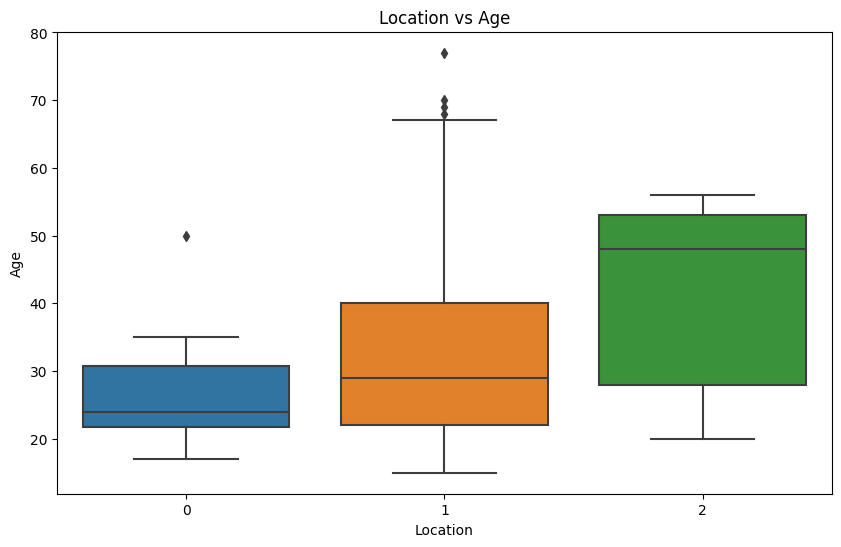

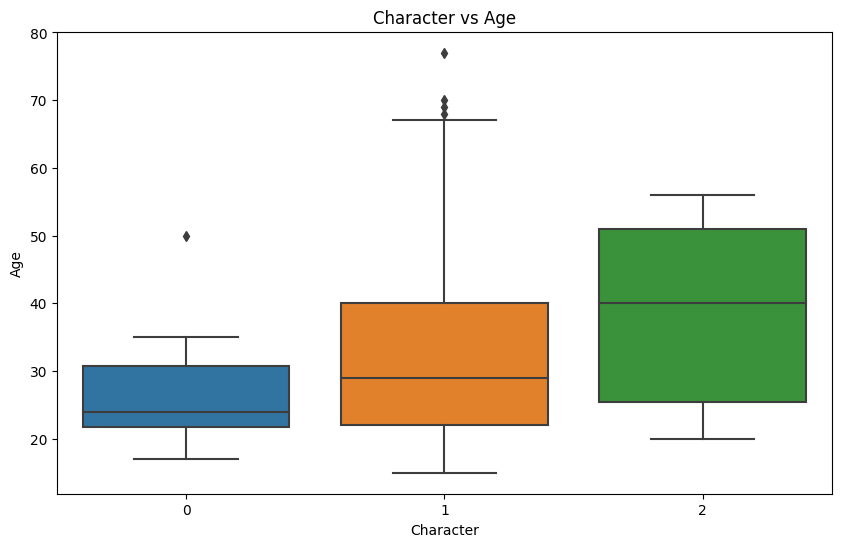

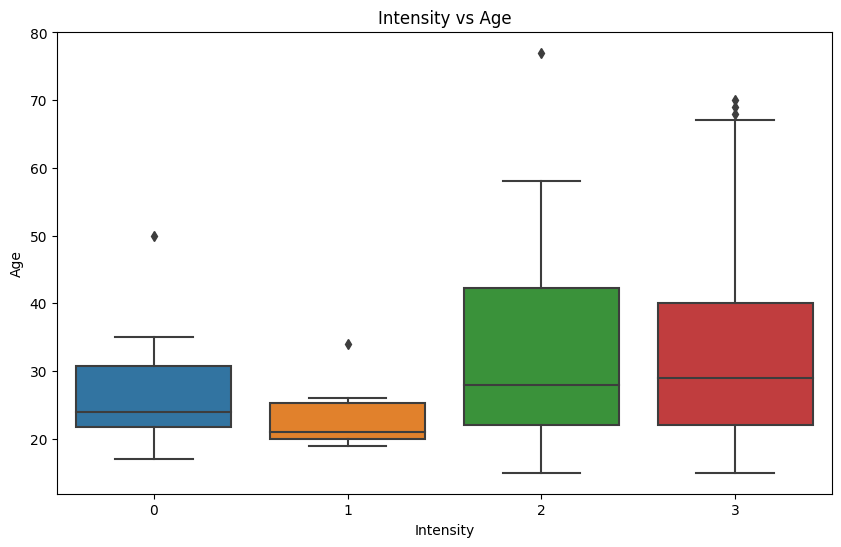

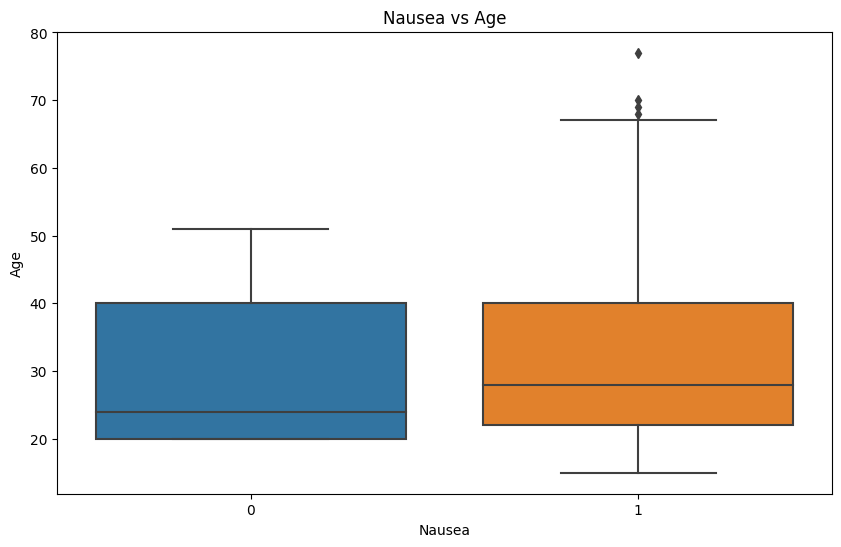

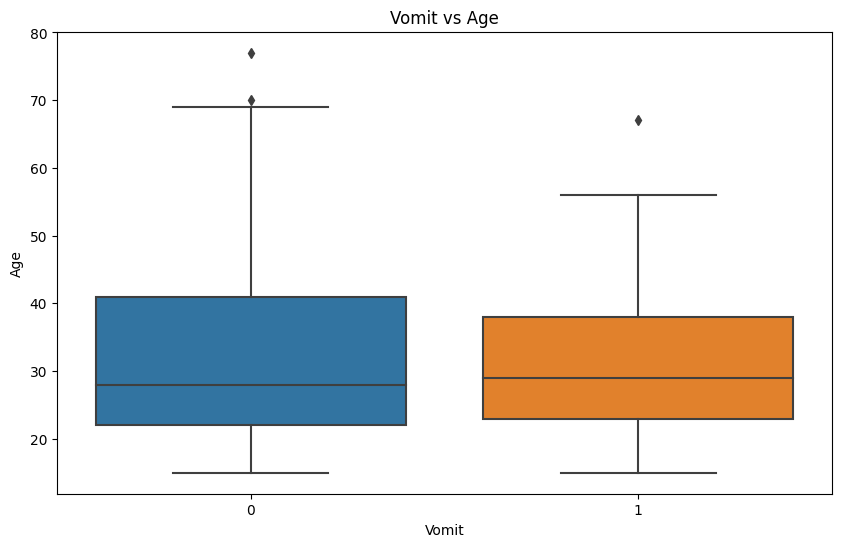

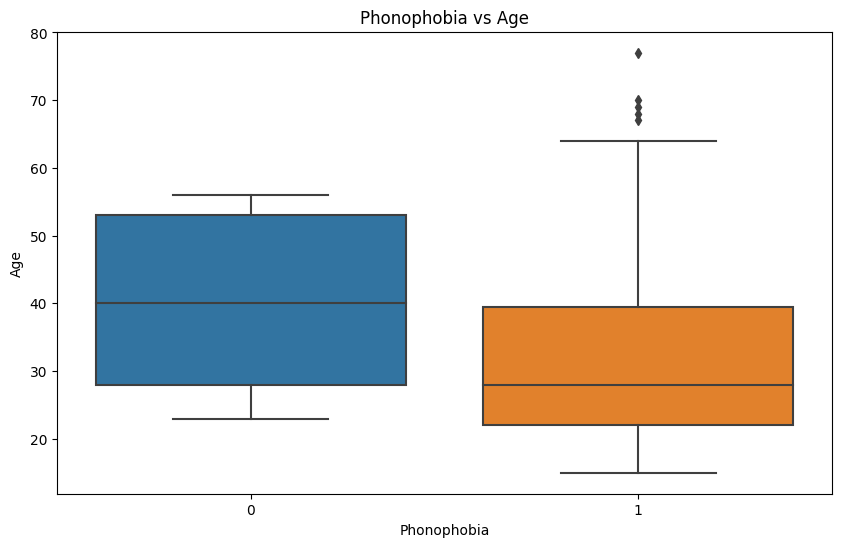

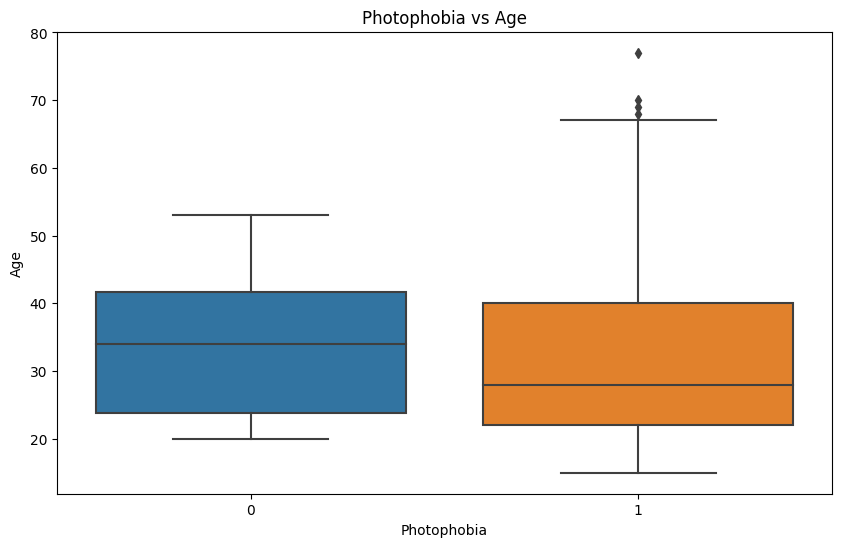

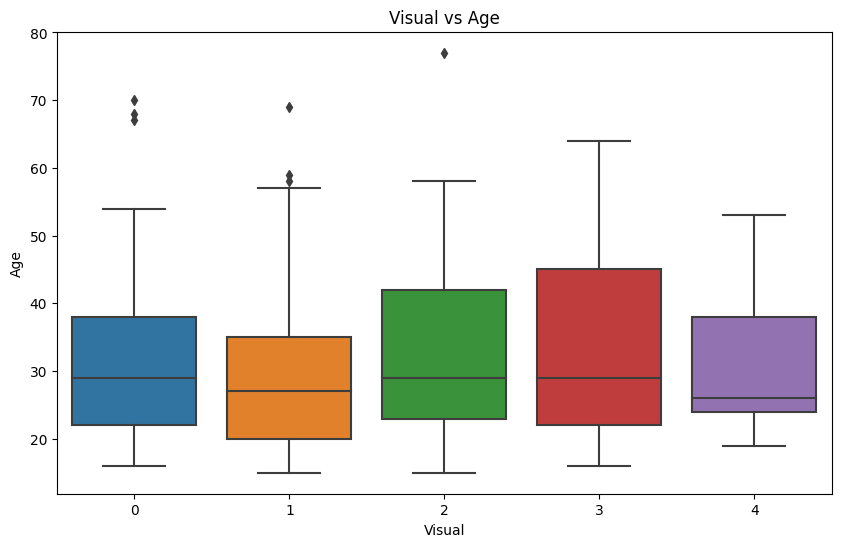

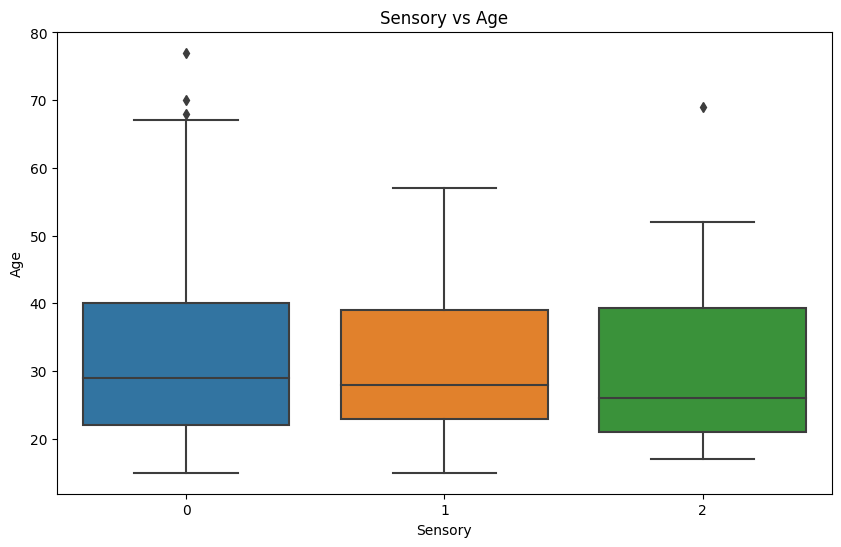

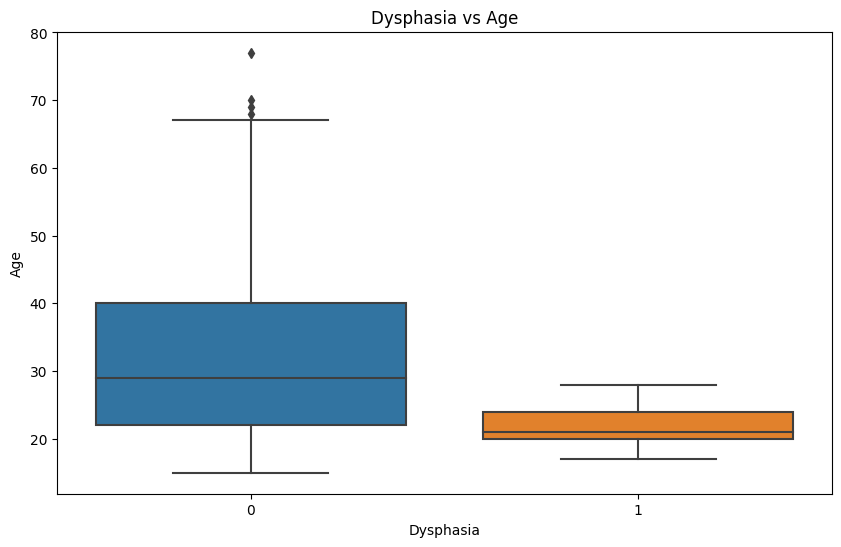

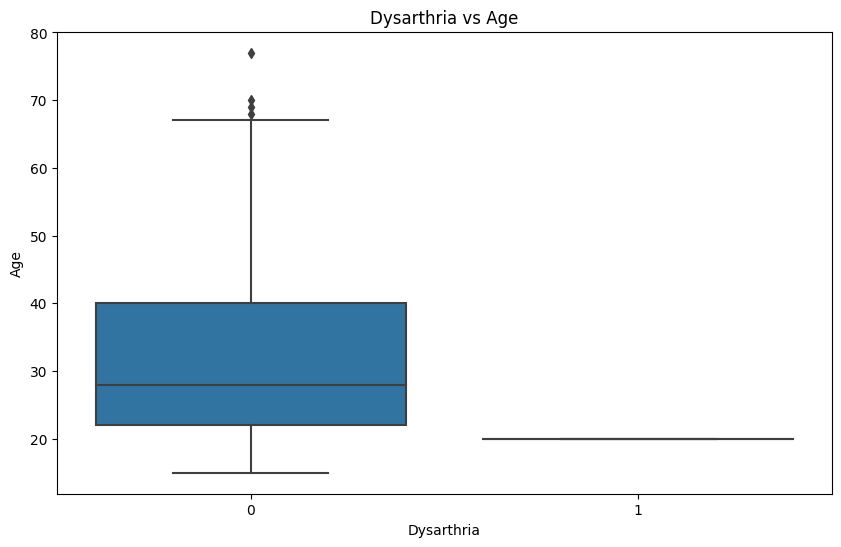

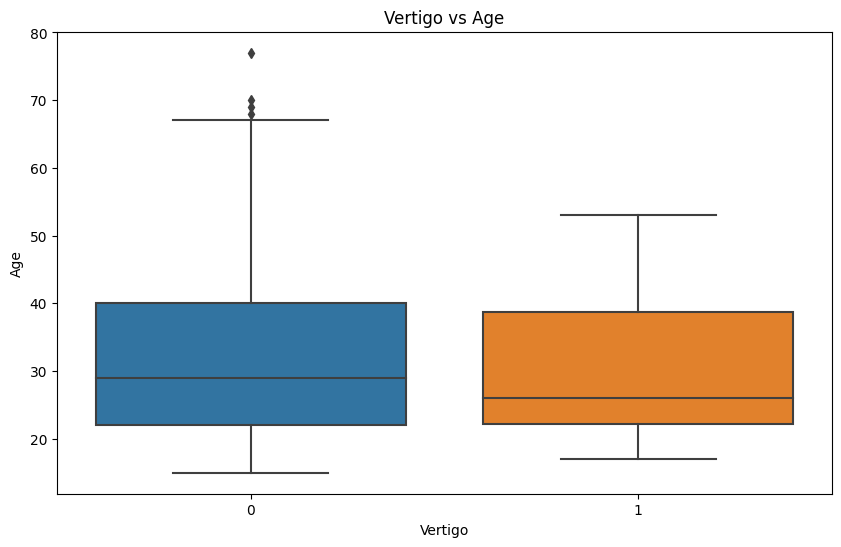

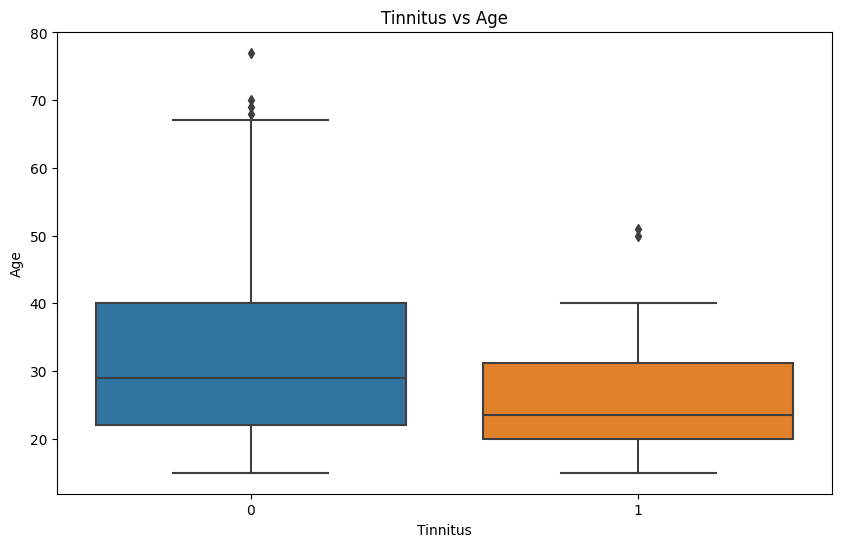

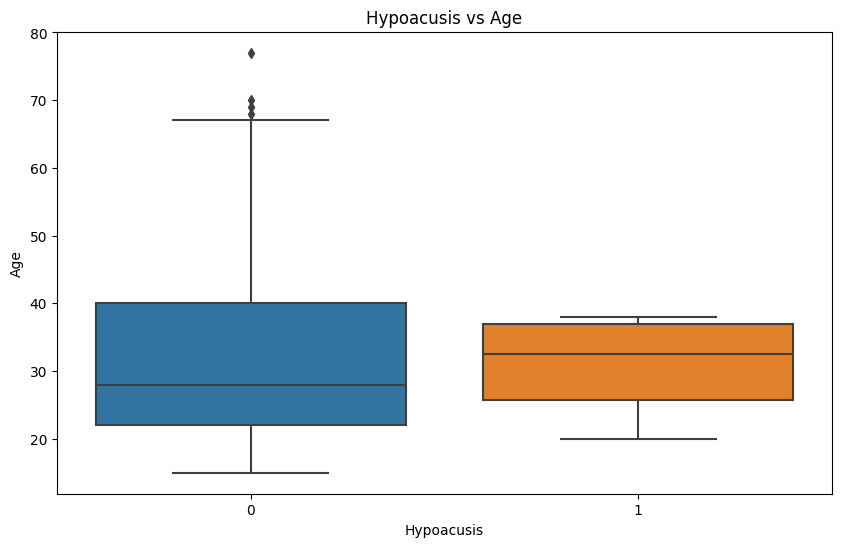

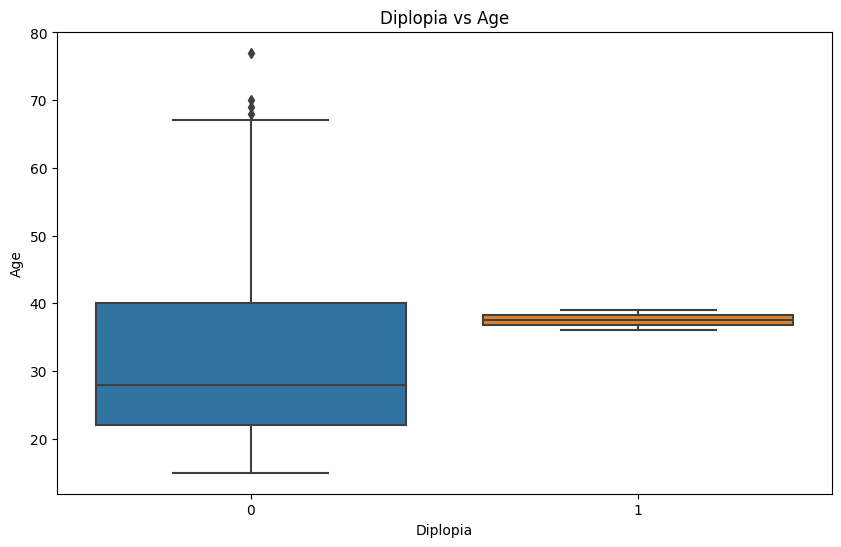

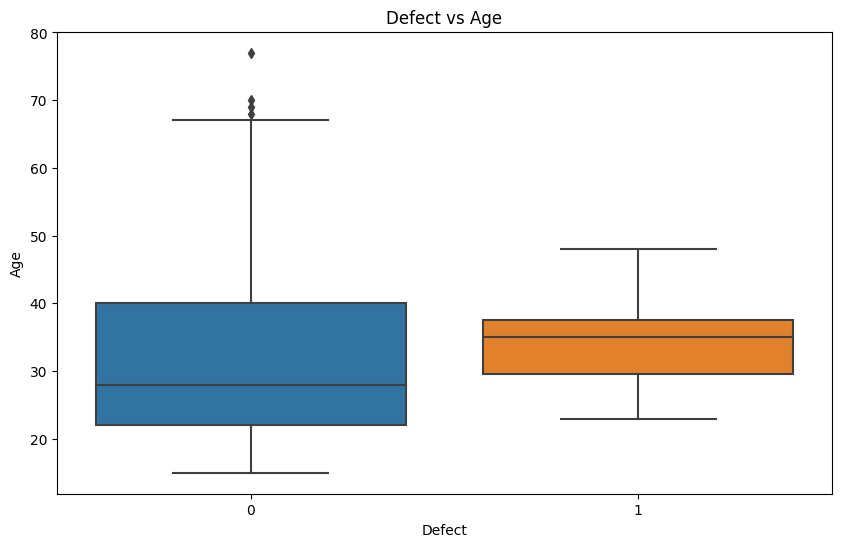

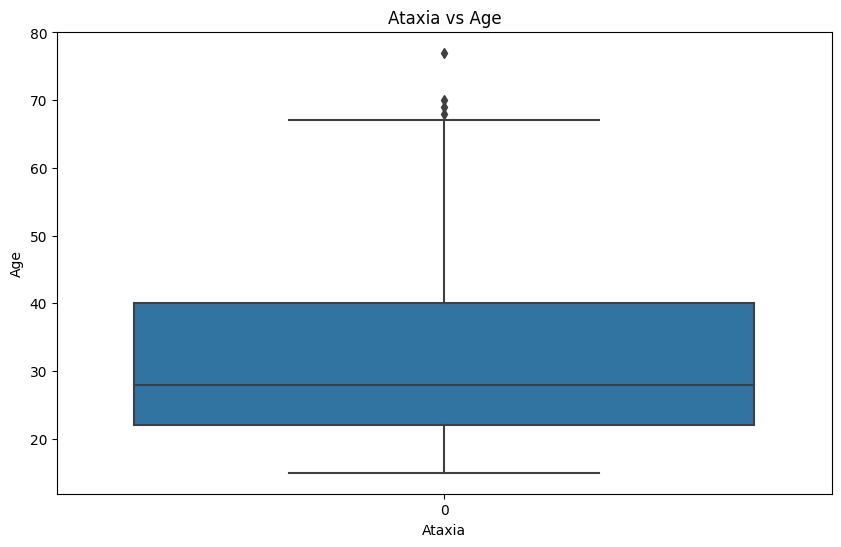

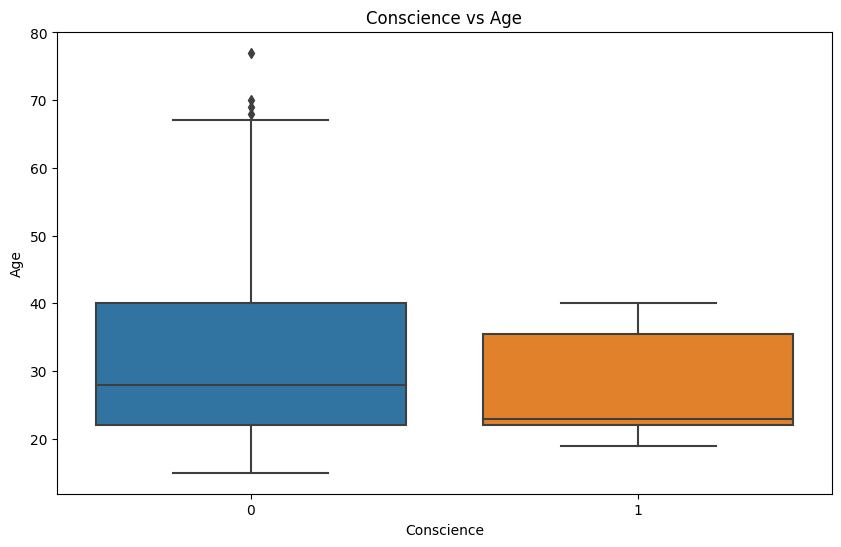

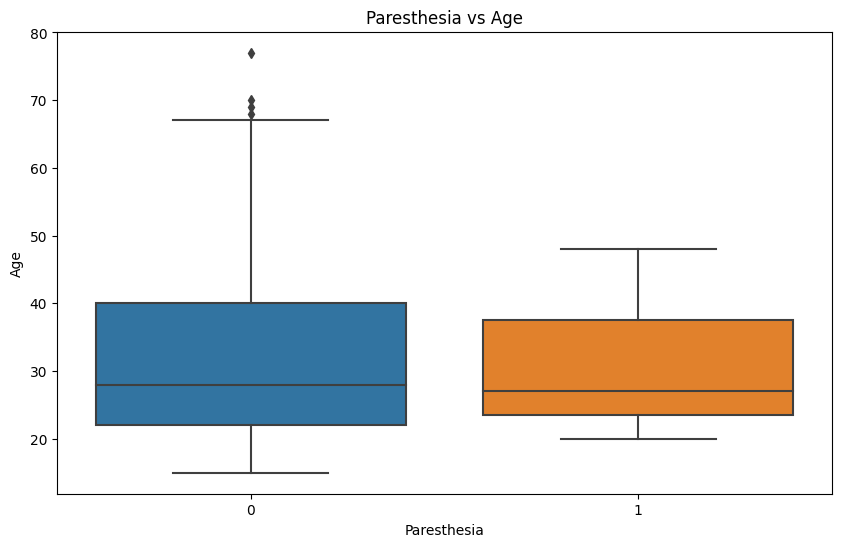

In [37]:


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Age', data=df)
    plt.title(f"{feature} vs Age")
    plt.show()


In [38]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [39]:
# Missing values.
df.isna().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

## Outcome total

In [40]:
df['Type'].value_counts()

Type
Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: count, dtype: int64

## Label Encode for final outcome

In [41]:
encoder = LabelEncoder()
df['Type_num'] = encoder.fit_transform(df['Type'])
df = df.drop(columns='Type')

## Split Dataset

In [42]:
X = df.drop(columns='Type_num')
Y = df['Type_num']

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

# Define a function to plot confusion matrix using seaborn

In [44]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X_test, Y_test):
    predictions = model.predict(X_test)
    cm = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)  # Change the cmap here
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

# 1. Logistic Regression

Logistic Regression Accuracy: 0.8916666666666667
Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.60      0.50      0.55         6
           2       0.90      0.95      0.92        19
           3       0.86      1.00      0.92         6
           4       0.50      0.33      0.40         3
           5       0.92      0.96      0.94        73
           6       1.00      1.00      1.00         5

    accuracy                           0.89       120
   macro avg       0.80      0.75      0.76       120
weighted avg       0.88      0.89      0.88       120



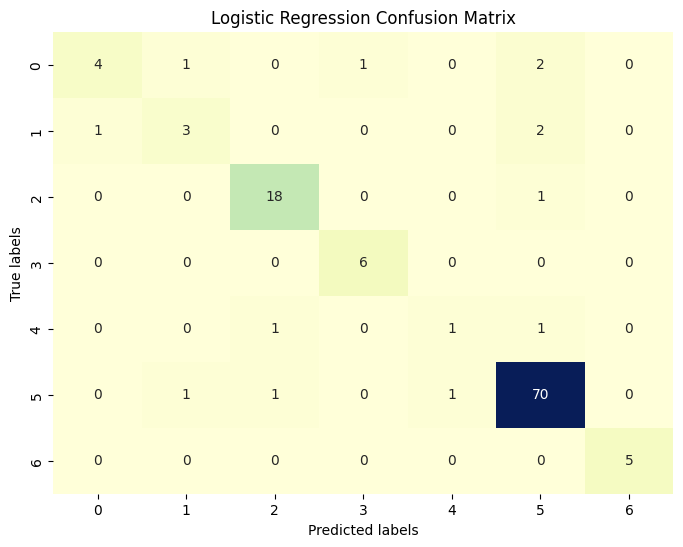

In [45]:

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
logistic_accuracy = logistic_model.score(X_test, Y_test)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

# Logistic Regression
logistic_predictions = logistic_model.predict(X_test)
print("Logistic Regression:")
print("Classification Report:")
print(classification_report(Y_test, logistic_predictions))

# Plot confusion matrix for each model
plot_confusion_matrix(logistic_model, X_test, Y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()





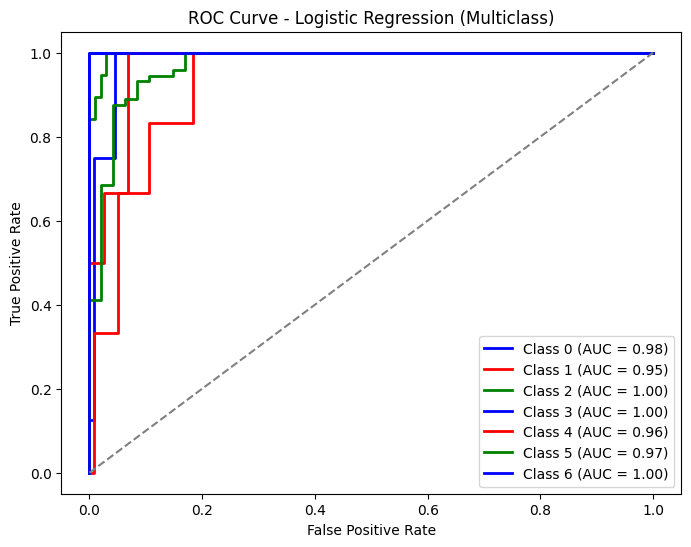

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))

# Compute ROC curve and ROC area for each class
lr_probs = logistic_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(Y_test))):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], lr_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), lr_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])  # Add more colors if more classes
for i, color in zip(range(len(np.unique(Y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Multiclass)')
plt.legend(loc='lower right')
plt.show()


# 2. Decision Tree

Decision Tree Accuracy: 0.7833333333333333

Decision Tree:
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.20      0.33      0.25         6
           2       0.86      1.00      0.93        19
           3       0.33      0.33      0.33         6
           4       0.29      0.67      0.40         3
           5       0.94      0.81      0.87        73
           6       1.00      1.00      1.00         5

    accuracy                           0.78       120
   macro avg       0.62      0.68      0.63       120
weighted avg       0.83      0.78      0.80       120



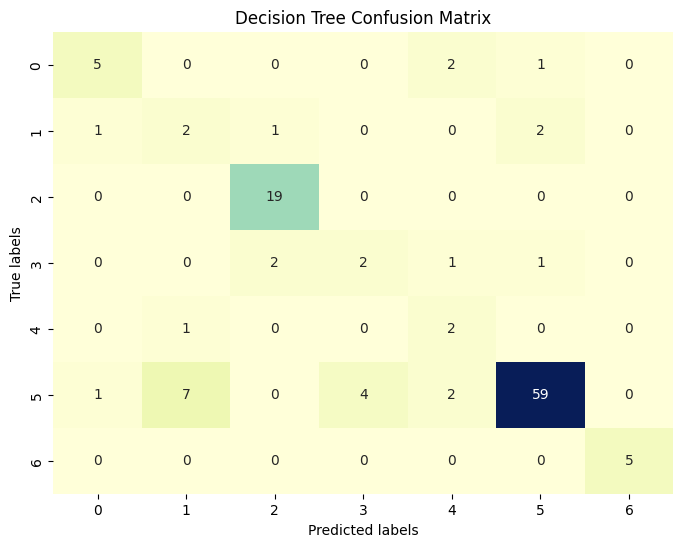

In [47]:


decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)
decision_tree_accuracy = decision_tree_model.score(X_test, Y_test)
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")

# Decision Tree
decision_tree_predictions = decision_tree_model.predict(X_test)
print("\nDecision Tree:")
print("Classification Report:")
print(classification_report(Y_test, decision_tree_predictions))

plot_confusion_matrix(decision_tree_model, X_test, Y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()




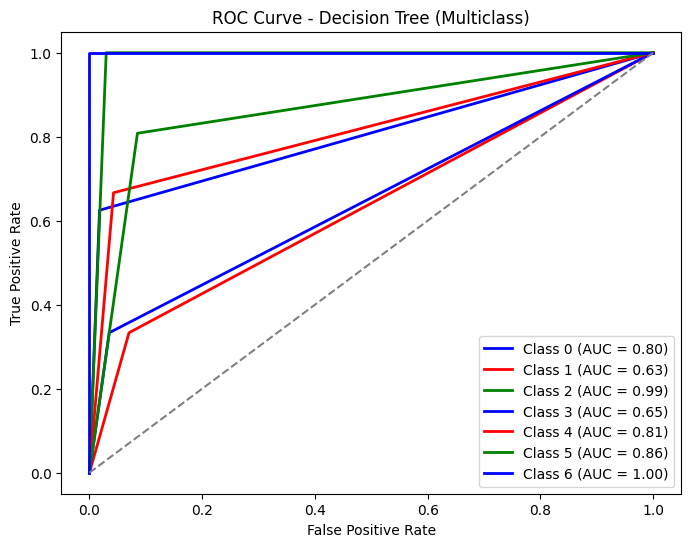

In [48]:

Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))

dt_probs = decision_tree_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(Y_test))):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], dt_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), dt_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(len(np.unique(Y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Multiclass)')
plt.legend(loc='lower right')
plt.show()


# 2. K-Nearest Neighbors (KNN)

KNN Accuracy: 0.7083333333333334

KNN:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.29      0.33      0.31         6
           2       0.85      0.58      0.69        19
           3       0.00      0.00      0.00         6
           4       1.00      0.33      0.50         3
           5       0.72      0.93      0.81        73
           6       1.00      0.40      0.57         5

    accuracy                           0.71       120
   macro avg       0.69      0.39      0.44       120
weighted avg       0.72      0.71      0.67       120



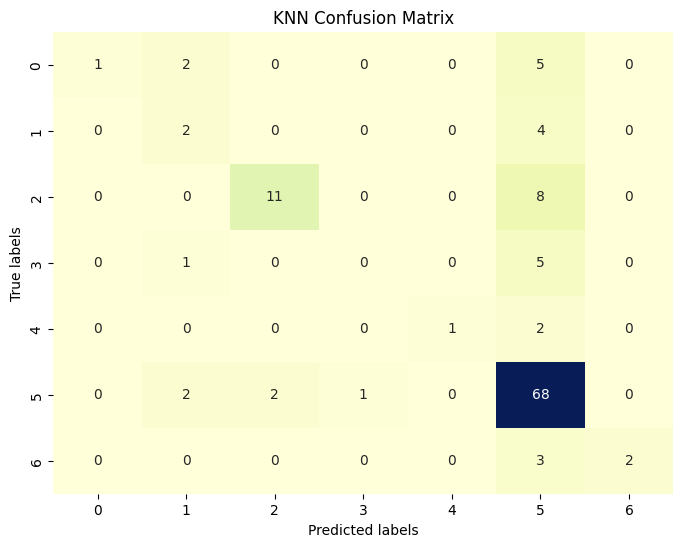

In [49]:

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_accuracy = knn_model.score(X_test, Y_test)
print(f"KNN Accuracy: {knn_accuracy}")
# KNN
knn_predictions = knn_model.predict(X_test)
print("\nKNN:")
print("Classification Report:")
print(classification_report(Y_test, knn_predictions))

plot_confusion_matrix(knn_model, X_test, Y_test)
plt.title('KNN Confusion Matrix')
plt.show()





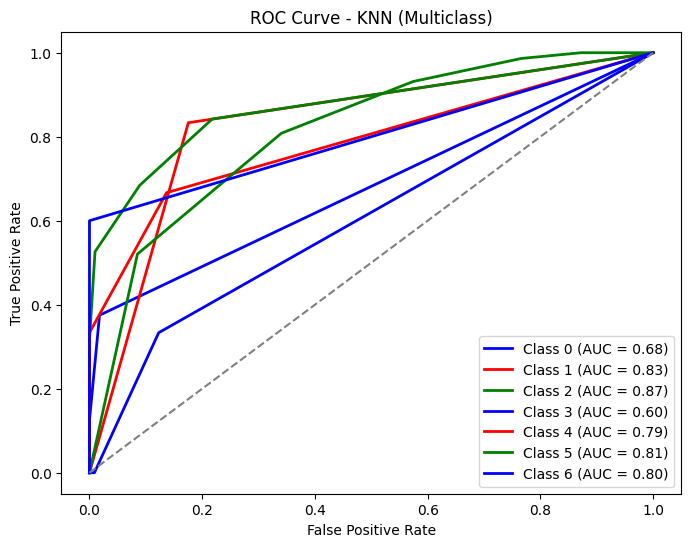

In [50]:

Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
knn_probs = knn_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(Y_test))):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], knn_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), knn_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(len(np.unique(Y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (Multiclass)')
plt.legend(loc='lower right')
plt.show()


# 3. Random Forest

Random Forest Accuracy: 0.8833333333333333

Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.50      0.67      0.57         6
           2       0.83      1.00      0.90        19
           3       1.00      0.50      0.67         6
           4       0.00      0.00      0.00         3
           5       0.96      0.93      0.94        73
           6       1.00      1.00      1.00         5

    accuracy                           0.88       120
   macro avg       0.72      0.71      0.70       120
weighted avg       0.88      0.88      0.88       120



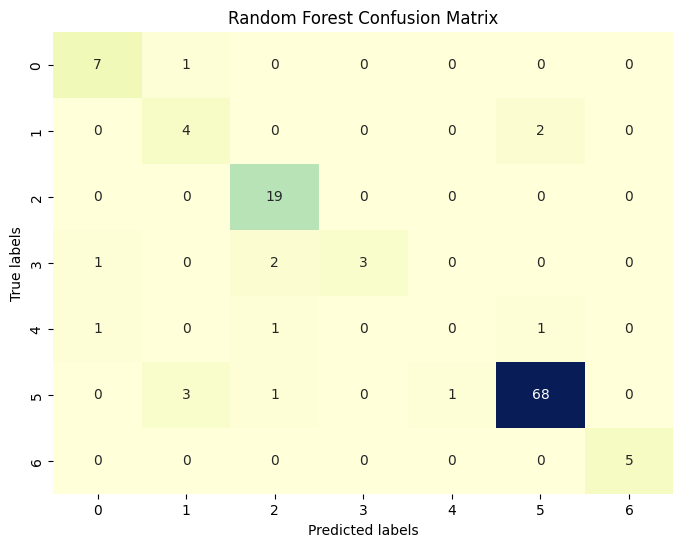

In [51]:

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
random_forest_accuracy = random_forest_model.score(X_test, Y_test)
print(f"Random Forest Accuracy: {random_forest_accuracy}")
# Random Forest
random_forest_predictions = random_forest_model.predict(X_test)
print("\nRandom Forest:")
print("Classification Report:")
print(classification_report(Y_test, random_forest_predictions))

plot_confusion_matrix(random_forest_model, X_test, Y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()

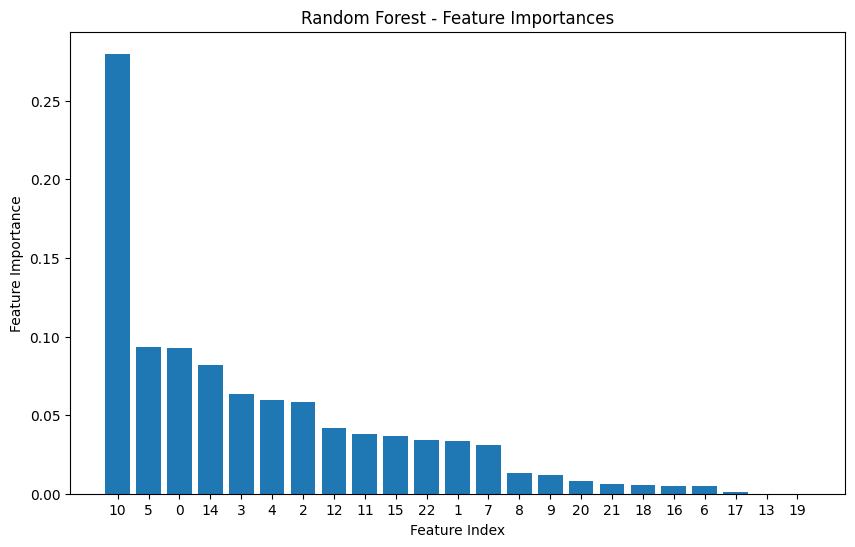

In [52]:
# Feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Random Forest - Feature Importances')
plt.show()
